# Overplot of AIA and FOXSI2

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
from sunpy.map import MapCubed
from sunpy.map import Map
import glob
import astropy.units as u
from sunpy.time import parse_time
from matplotlib.patches import Rectangle
import numpy as np

## AIA-171

In [3]:
data_dir = '/Volumes/500GB/AIA/'
str_indices = {'94':'', '131':'', '171':'', '193':'', '211':'', '304':'', '335':'', '1600':'', '1700':''}
file_list = {}
maps = {}
for key in str_indices:
    file_list.update({key: glob.glob(data_dir + '*' + key + '*.fits')})
    
these_files = file_list['171'][49:90]

maps = []

for f in these_files:
    maps.append(Map(f))

cubed = MapCubed(maps)

In [4]:
these_files = file_list['171'][57:62]
maps = []
for f in these_files:
    maps.append(Map(f))
cubed = MapCubed(maps)
x_range = u.Quantity([-600, 600], 'arcsec')
y_range = u.Quantity([-850, 400], 'arcsec')
scubed = cubed.submap(x_range, y_range)
sscubed171 = scubed.superpixel(u.Quantity([15 * u.pixel, 15 * u.pixel]))

[ 0.  0.] pix


In [5]:
foxsi_fits = '/Users/Kamilobu/Desktop/foxsi_d6.fits'
foxsimap = Map(foxsi_fits)

/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:253: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  w2.dsun = self.dsun
/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:253: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  w2.dsun = self.dsun
/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:253: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  w2.dsun = self.dsun
/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:253: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  w2.dsun = self.dsun
/Users/Kamilobu/anaconda

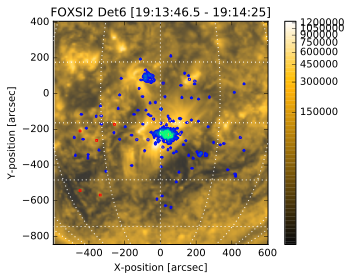

In [39]:
f, ax0 = plt.subplots()
FOX171 = Map(sscubed171[0],foxsimap, composite=True)
FOX171.set_levels(1,[1,2,3,4,5,6,7,8,9,10,15,20,25,35,50,70,90],percent=True)
FOX171.set_alpha(0,alpha=0.8)
a=FOX171.get_plot_settings(1)
a['cmap']='winter'
FOX171.set_plot_settings(1,a)
FOX171.plot()
FOX171.draw_grid()

'''Tiny-Flares'''
xrect = [-257, -450, -450, -357, -337] # arcsec
yrect = [-172, -209, -543, -262, -568] # arcsec
ax0.add_patch(Rectangle((xrect[0]-5, yrect[0]-5), 10, 10, fill=None,edgecolor='red',linewidth=1))
ax0.add_patch(Rectangle((xrect[1]-5, yrect[1]-5), 10, 10, fill=None,edgecolor='red',linewidth=1))
ax0.add_patch(Rectangle((xrect[2]-5, yrect[2]-5), 10, 10, fill=None,edgecolor='red',linewidth=1))
ax0.add_patch(Rectangle((xrect[3]-5, yrect[3]-5), 10, 10, fill=None,edgecolor='red',linewidth=1))
ax0.add_patch(Rectangle((xrect[4]-5, yrect[4]-5), 10, 10, fill=None,edgecolor='red',linewidth=1))

plt.colorbar()
ax0.set_title('FOXSI2 Det6 [19:13:46.5 - 19:14:25]')

#### Correcting the time string in the Header of the FOXSI fits

In [48]:
from astropy.io import fits
data, header = fits.getdata('/Users/Kamilobu/Desktop/foxsi_d5.fits', header=True)
hdu_number = 0
fits.getheader('/Users/Kamilobu/Desktop/foxsi_d5.fits', hdu_number)
header['DATE_OBS'] = '2014-12-11T19:14:05.75'
header['DATE-OBS'] = '2014-12-11T19:14:05.75'
fits.writeto('/Users/Kamilobu/Desktop/foxsi_d5.fits', data, header, clobber=True)

## Plotting other FOXSI detectors to check rotation

### Det 0

In [44]:
foxsi_fits = '/Users/Kamilobu/Desktop/foxsi_d0.fits'
foxsimap = Map(foxsi_fits)

/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:251: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  w2.heliographic_latitude = self.heliographic_latitude
/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:253: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  w2.dsun = self.dsun
/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:251: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  w2.heliographic_latitude = self.heliographic_latitude
/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:253: Warning: Missing metadata for Sun-spacecraft separation: assuming S

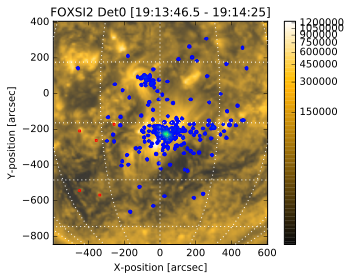

In [45]:
f, ax0 = plt.subplots()
FOX171 = Map(sscubed171[0],foxsimap, composite=True)
FOX171.set_levels(1,[1,2,3,4,5,6,7,8,9,10,15,20,25,35,50,70,90],percent=True)
FOX171.set_alpha(0,alpha=0.8)
a=FOX171.get_plot_settings(1)
a['cmap']='winter'
FOX171.set_plot_settings(1,a)
FOX171.plot()
FOX171.draw_grid()

'''Tiny-Flares'''
xrect = [-257, -450, -450, -357, -337] # arcsec
yrect = [-172, -209, -543, -262, -568] # arcsec
ax0.add_patch(Rectangle((xrect[0]-5, yrect[0]-5), 10, 10, fill=None,edgecolor='red',linewidth=1))
ax0.add_patch(Rectangle((xrect[1]-5, yrect[1]-5), 10, 10, fill=None,edgecolor='red',linewidth=1))
ax0.add_patch(Rectangle((xrect[2]-5, yrect[2]-5), 10, 10, fill=None,edgecolor='red',linewidth=1))
ax0.add_patch(Rectangle((xrect[3]-5, yrect[3]-5), 10, 10, fill=None,edgecolor='red',linewidth=1))
ax0.add_patch(Rectangle((xrect[4]-5, yrect[4]-5), 10, 10, fill=None,edgecolor='red',linewidth=1))

plt.colorbar()
ax0.set_title('FOXSI2 Det0 [19:13:46.5 - 19:14:25]')

### Det 1

In [50]:
foxsi_fits = '/Users/Kamilobu/Desktop/foxsi_d1.fits'
foxsimap = Map(foxsi_fits)

/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:251: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  w2.heliographic_latitude = self.heliographic_latitude
/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:253: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  w2.dsun = self.dsun
/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:251: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  w2.heliographic_latitude = self.heliographic_latitude
/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:253: Warning: Missing metadata for Sun-spacecraft separation: assuming S

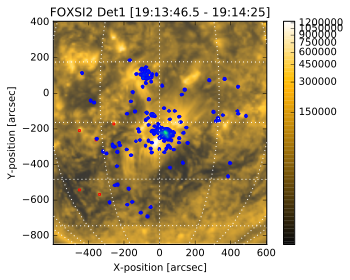

In [51]:
f, ax0 = plt.subplots()
FOX171 = Map(sscubed171[0],foxsimap, composite=True)
FOX171.set_levels(1,[1,2,3,4,5,6,7,8,9,10,15,20,25,35,50,70,90],percent=True)
FOX171.set_alpha(0,alpha=0.8)
a=FOX171.get_plot_settings(1)
a['cmap']='winter'
FOX171.set_plot_settings(1,a)
FOX171.plot()
FOX171.draw_grid()

'''Tiny-Flares'''
xrect = [-257, -450, -450, -357, -337] # arcsec
yrect = [-172, -209, -543, -262, -568] # arcsec
ax0.add_patch(Rectangle((xrect[0]-5, yrect[0]-5), 10, 10, fill=None,edgecolor='red',linewidth=1))
ax0.add_patch(Rectangle((xrect[1]-5, yrect[1]-5), 10, 10, fill=None,edgecolor='red',linewidth=1))
ax0.add_patch(Rectangle((xrect[2]-5, yrect[2]-5), 10, 10, fill=None,edgecolor='red',linewidth=1))
ax0.add_patch(Rectangle((xrect[3]-5, yrect[3]-5), 10, 10, fill=None,edgecolor='red',linewidth=1))
ax0.add_patch(Rectangle((xrect[4]-5, yrect[4]-5), 10, 10, fill=None,edgecolor='red',linewidth=1))

plt.colorbar()
ax0.set_title('FOXSI2 Det1 [19:13:46.5 - 19:14:25]')

### Det 4

In [52]:
foxsi_fits = '/Users/Kamilobu/Desktop/foxsi_d4.fits'
foxsimap = Map(foxsi_fits)

/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:251: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  w2.heliographic_latitude = self.heliographic_latitude
/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:253: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  w2.dsun = self.dsun
/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:251: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  w2.heliographic_latitude = self.heliographic_latitude
/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:253: Warning: Missing metadata for Sun-spacecraft separation: assuming S

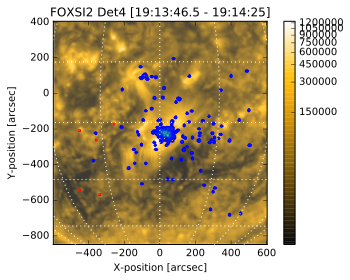

In [53]:
f, ax0 = plt.subplots()
FOX171 = Map(sscubed171[0],foxsimap, composite=True)
FOX171.set_levels(1,[1,2,3,4,5,6,7,8,9,10,15,20,25,35,50,70,90],percent=True)
FOX171.set_alpha(0,alpha=0.8)
a=FOX171.get_plot_settings(1)
a['cmap']='winter'
FOX171.set_plot_settings(1,a)
FOX171.plot()
FOX171.draw_grid()

'''Tiny-Flares'''
xrect = [-257, -450, -450, -357, -337] # arcsec
yrect = [-172, -209, -543, -262, -568] # arcsec
ax0.add_patch(Rectangle((xrect[0]-5, yrect[0]-5), 10, 10, fill=None,edgecolor='red',linewidth=1))
ax0.add_patch(Rectangle((xrect[1]-5, yrect[1]-5), 10, 10, fill=None,edgecolor='red',linewidth=1))
ax0.add_patch(Rectangle((xrect[2]-5, yrect[2]-5), 10, 10, fill=None,edgecolor='red',linewidth=1))
ax0.add_patch(Rectangle((xrect[3]-5, yrect[3]-5), 10, 10, fill=None,edgecolor='red',linewidth=1))
ax0.add_patch(Rectangle((xrect[4]-5, yrect[4]-5), 10, 10, fill=None,edgecolor='red',linewidth=1))

plt.colorbar()
ax0.set_title('FOXSI2 Det4 [19:13:46.5 - 19:14:25]')

### Det 5

In [54]:
foxsi_fits = '/Users/Kamilobu/Desktop/foxsi_d5.fits'
foxsimap = Map(foxsi_fits)

/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:251: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  w2.heliographic_latitude = self.heliographic_latitude
/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:253: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  w2.dsun = self.dsun
/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:251: Warning: Missing metadata for heliographic latitude: assuming Earth-based observer
  w2.heliographic_latitude = self.heliographic_latitude
/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:253: Warning: Missing metadata for Sun-spacecraft separation: assuming S

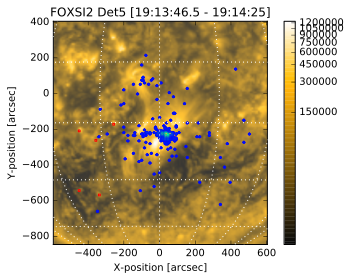

In [55]:
f, ax0 = plt.subplots()
FOX171 = Map(sscubed171[0],foxsimap, composite=True)
FOX171.set_levels(1,[1,2,3,4,5,6,7,8,9,10,15,20,25,35,50,70,90],percent=True)
FOX171.set_alpha(0,alpha=0.8)
a=FOX171.get_plot_settings(1)
a['cmap']='winter'
FOX171.set_plot_settings(1,a)
FOX171.plot()
FOX171.draw_grid()

'''Tiny-Flares'''
xrect = [-257, -450, -450, -357, -337] # arcsec
yrect = [-172, -209, -543, -262, -568] # arcsec
ax0.add_patch(Rectangle((xrect[0]-5, yrect[0]-5), 10, 10, fill=None,edgecolor='red',linewidth=1))
ax0.add_patch(Rectangle((xrect[1]-5, yrect[1]-5), 10, 10, fill=None,edgecolor='red',linewidth=1))
ax0.add_patch(Rectangle((xrect[2]-5, yrect[2]-5), 10, 10, fill=None,edgecolor='red',linewidth=1))
ax0.add_patch(Rectangle((xrect[3]-5, yrect[3]-5), 10, 10, fill=None,edgecolor='red',linewidth=1))
ax0.add_patch(Rectangle((xrect[4]-5, yrect[4]-5), 10, 10, fill=None,edgecolor='red',linewidth=1))

plt.colorbar()
ax0.set_title('FOXSI2 Det5 [19:13:46.5 - 19:14:25]')